# Goal:Hotel Cancellation Predition

# Importing necessary Libraries

In [352]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Loading Dataset

In [353]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [354]:
# Inspecting datatypes of coloumns

In [355]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_month_year                 object
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [356]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,26,NaN,12,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,May 2017,NaN,August,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,21-10-2015
freq,79330,NaN,NaN,6313,NaN,13877,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,NaN,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,NaN,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,NaN,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,NaN,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,NaN,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,NaN,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [358]:
df.dtypes.value_counts()

int64      16
object     13
float64     4
dtype: int64

In [359]:
# We find 16 integer  coloumns,13 object datatype coloumns,4 float coloumns

In [360]:
# dataframe shape
df.shape

(119390, 33)

In [361]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [ ]:
df.corr()['is_canceled']

In [362]:
# Some inspection about the data distribution

In [363]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [364]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [365]:
# Here in is_cancelled coloumn 1 is cancelled 0 is not cancelled

In [366]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [367]:
# Create target coloumn from is cancelled coloumn

In [368]:
df['target']=np.where(df['is_canceled'].isin([1]),1,0) 

In [369]:
df['target'].value_counts()

0    75166
1    44224
Name: target, dtype: int64

In [370]:
df['target'].mean()

0.37041628277075134

In [371]:
# Lets visualise this target coloumn

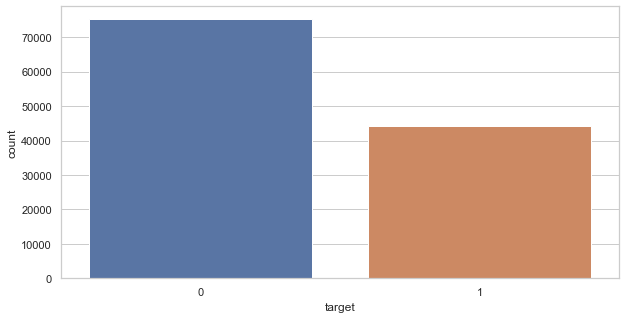

In [372]:
sns.countplot(x='target',data=df)
plt.show()

In [373]:
# Missing Value Analysis

In [374]:
# check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_month_year                     0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [375]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
previous_cancellations                 0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults          

In [376]:
# We find company,agent,country and children has missing values

In [377]:
# Delving into nature of the data coloumns we find out that 
# For company if no data is given then it is private booking else it is booked by his company-So lets substitute the null values by 0
# If agent is missing then most likely made by the person himself without help from any travel agent
# For country if value missing then it is most liekly unknown
# If children data is missing then most likely the person deosn't have children


In [378]:
# Lets make a dictionary of such replacements to be done
nadict = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}

In [379]:
# fill null in dataframe
df = df.fillna(nadict)

# "meal" contains values "Undefined", which is same as SC category.So we replace undefined by sc
df["meal"].replace("Undefined", "SC", inplace=True)

In [380]:
df.isnull().any().sum()

0

#Some points to note
agent-The id of agent that did reservation is of no importanceto us
comany-The id of company that did reservation is of no importanceto us
reservation_status_date - We have other features (like: arrival_date_week_number, arrival_date_day_of_month etc) that gives us the same information


In [381]:
# Lets do some EDA

In [382]:
df['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

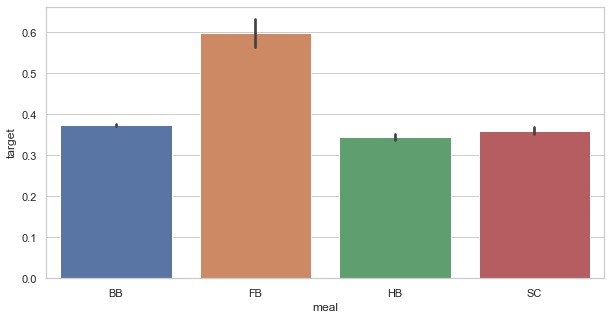

In [383]:
from numpy import mean
ax = sns.barplot(x="meal", y="target", data=df, estimator=mean)

In [384]:
# From dataset description we find that
# BB – Bed &Breakfast;
# HB – Half board(breakfastandone
# other meal – usually dinner);
# FB – Full board(breakfast,lunchand
# dinner)

In [385]:
# So FB has highest cancellation rates

In [386]:
# Lets find which coutries have highest cacellation rates

In [387]:
df.groupby('country')['target'].mean()

country
ABW    0.000000
AGO    0.566298
AIA    0.000000
ALB    0.166667
AND    0.714286
         ...   
VGB    1.000000
VNM    0.250000
ZAF    0.387500
ZMB    0.500000
ZWE    0.500000
Name: target, Length: 178, dtype: float64

In [388]:
# Highest cancellation countries
df.groupby('country')['target'].mean().sort_values(ascending=False).head(15)

country
FJI    1.000000
GGY    1.000000
GLP    1.000000
UMI    1.000000
HND    1.000000
IMN    1.000000
JEY    1.000000
NIC    1.000000
KHM    1.000000
VGB    1.000000
BEN    1.000000
MYT    1.000000
MAC    0.937500
HKG    0.896552
TJK    0.888889
Name: target, dtype: float64

In [389]:
sns.set(rc={'figure.figsize':(10,5)})

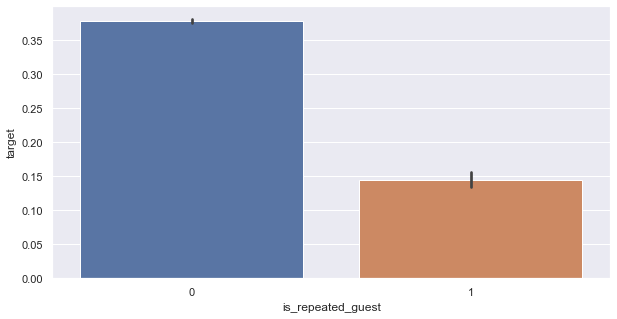

In [390]:
# Repeated Guest
ax = sns.barplot(x="is_repeated_guest", y="target", data=df, estimator=mean)

In [391]:
# We observe that repeated guest have much lower cancellation rates

In [392]:
# Market Segment Bookings

In [393]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

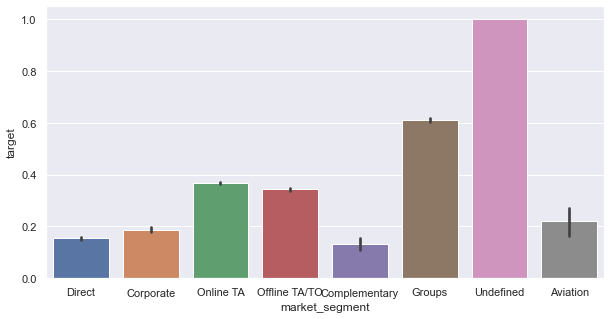

In [394]:
ax = sns.barplot(x="market_segment", y="target", data=df, estimator=mean)

In [395]:
df.groupby('market_segment')['target'].mean()

market_segment
Aviation         0.219409
Complementary    0.130552
Corporate        0.187347
Direct           0.153419
Groups           0.610620
Offline TA/TO    0.343160
Online TA        0.367211
Undefined        1.000000
Name: target, dtype: float64

In [396]:
# Ignoring undefined category snce it has only 2 datapoints we find that groups market segment has highest cancellation rates

In [397]:
# Inspection of month of arrival

In [398]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

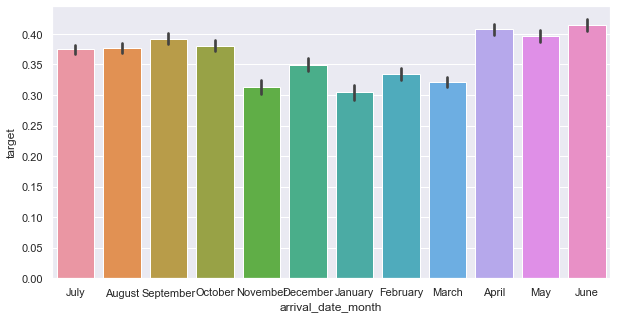

In [399]:
ax = sns.barplot(x="arrival_date_month", y="target", data=df, estimator=mean)

In [400]:
df.groupby('arrival_date_month')['target'].mean()

arrival_date_month
April        0.407972
August       0.377531
December     0.349705
February     0.334160
January      0.304773
July         0.374536
June         0.414572
March        0.321523
May          0.396658
November     0.312334
October      0.380466
September    0.391702
Name: target, dtype: float64

In [401]:
# Stays in weekend nights

In [402]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

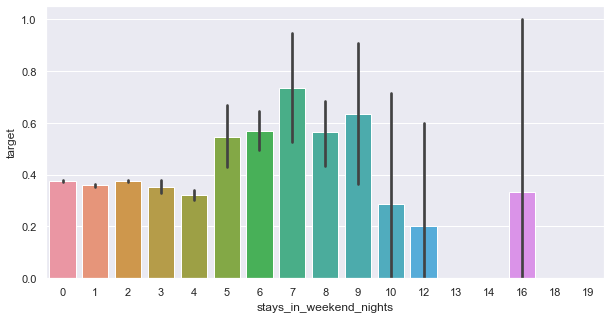

In [403]:
ax = sns.barplot(x="stays_in_weekend_nights", y="target", data=df, estimator=mean)

In [404]:
df.groupby('stays_in_weekend_nights')['target'].mean()

stays_in_weekend_nights
0     0.375034
1     0.359401
2     0.374835
3     0.352661
4     0.322372
5     0.544304
6     0.568627
7     0.736842
8     0.566667
9     0.636364
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: target, dtype: float64

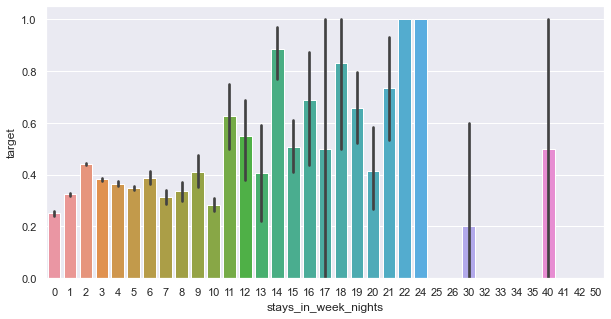

In [405]:
ax = sns.barplot(x="stays_in_week_nights", y="target", data=df, estimator=mean)

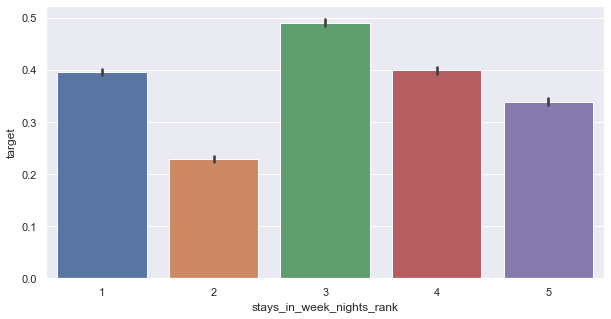

In [406]:
df['stays_in_week_nights_rank']=pd.qcut(df['stays_in_week_nights'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="stays_in_week_nights_rank",y="target",data=df,estimator=mean)

In [407]:
df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].min()

stays_in_week_nights_rank
1    0
2    1
3    2
4    2
5    4
Name: stays_in_week_nights, dtype: int64

In [408]:
df['stay_in_week_night_grp']=np.where(df['stays_in_week_nights_rank'].isin(['1','2']),1,np.where(df['stays_in_week_nights_rank'].isin(['3','4']),2,3))
df.groupby('stay_in_week_night_grp')['target'].mean()

stay_in_week_night_grp
3    0.370416
Name: target, dtype: float64

In [409]:
# Previous cancellations

In [410]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

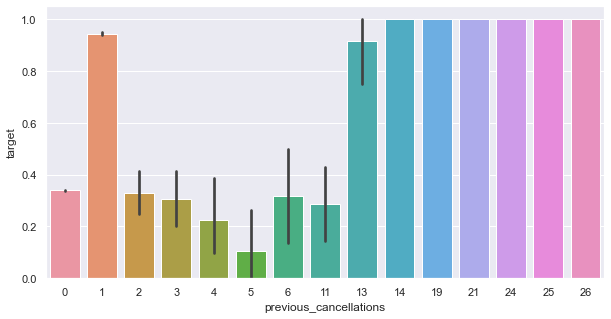

In [411]:
ax = sns.barplot(x="previous_cancellations", y="target", data=df, estimator=mean)

In [412]:
df.groupby('previous_cancellations')['target'].mean()

previous_cancellations
0     0.339061
1     0.944307
2     0.327586
3     0.307692
4     0.225806
5     0.105263
6     0.318182
11    0.285714
13    0.916667
14    1.000000
19    1.000000
21    1.000000
24    1.000000
25    1.000000
26    1.000000
Name: target, dtype: float64

In [413]:
# MAking previous Cancellation Indicator variable

In [414]:
df['prev_cancel_ind']=np.where(df['previous_cancellations'].isin([0]),0,1)
df.groupby('prev_cancel_ind')['target'].count()

prev_cancel_ind
0    112906
1      6484
Name: target, dtype: int64

In [415]:
df['prev_cancel_ind'].value_counts()

0    112906
1      6484
Name: prev_cancel_ind, dtype: int64

In [416]:
# Booking Changes Inspecvtion

In [417]:
df.groupby('booking_changes')['target'].mean()

booking_changes
0     0.408542
1     0.142272
2     0.201314
3     0.155340
4     0.178191
5     0.169492
6     0.285714
7     0.096774
8     0.235294
9     0.125000
10    0.166667
11    0.000000
12    0.000000
13    0.000000
14    0.200000
15    0.000000
16    0.500000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
Name: target, dtype: float64

In [418]:
# Distribution Channel Inspection

In [419]:
df["distribution_channel"].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

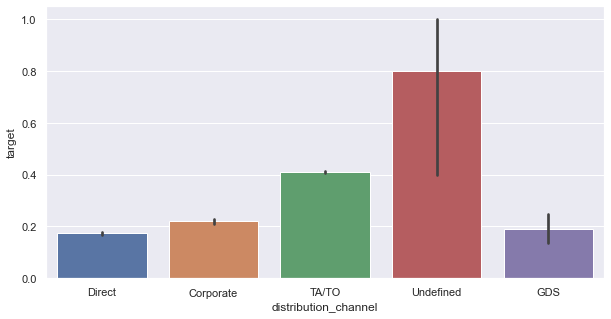

In [420]:
ax = sns.barplot(x="distribution_channel", y="target", data=df, estimator=mean)

In [421]:
# Reserved Room Type

In [422]:
df["reserved_room_type"].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

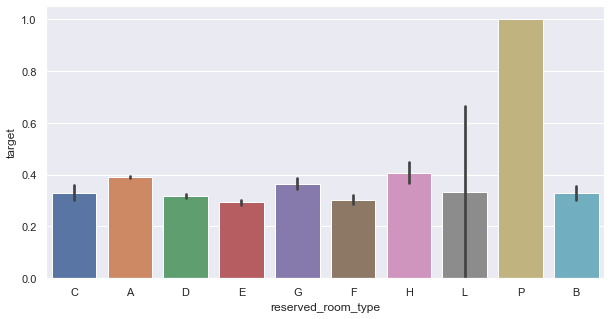

In [423]:
ax = sns.barplot(x="reserved_room_type", y="target", data=df, estimator=mean)

In [424]:
# Deposit Type Inspection

In [425]:
df.groupby('deposit_type')['target'].count()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: target, dtype: int64

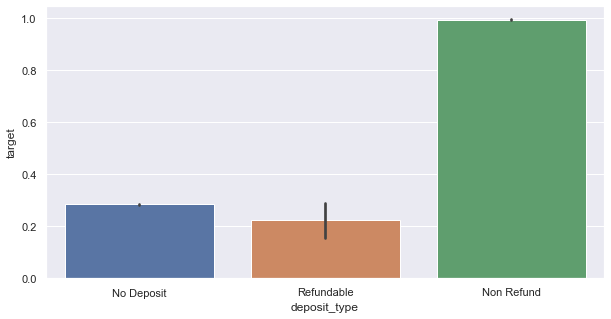

In [426]:
ax = sns.barplot(x="deposit_type", y="target", data=df, estimator=mean)

In [427]:
# Interesting Trend that nonrefundable had such high cancellation rates whereas nodposit and refundable had lower rates

In [428]:
df.groupby('deposit_type')['target'].mean()

deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: target, dtype: float64

In [429]:
# Customer Type Inspection

In [430]:
df.groupby('customer_type')['target'].count()

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: target, dtype: int64

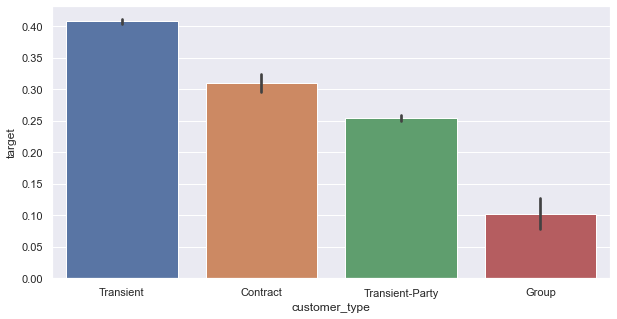

In [431]:
ax = sns.barplot(x="customer_type", y="target", data=df, estimator=mean)

In [432]:
# total_of_special_requests 

In [433]:
df.groupby('total_of_special_requests')['target'].count()

total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: target, dtype: int64

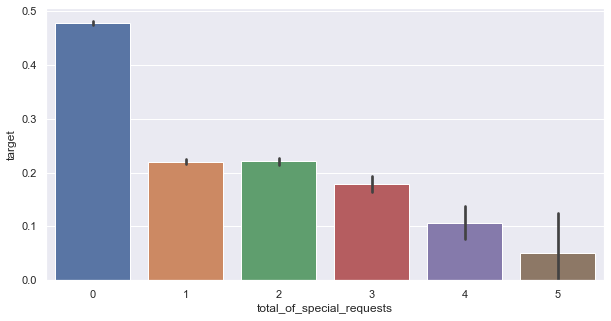

In [434]:
ax = sns.barplot(x="total_of_special_requests", y="target", data=df, estimator=mean)

In [435]:
# Create day_wait_rank

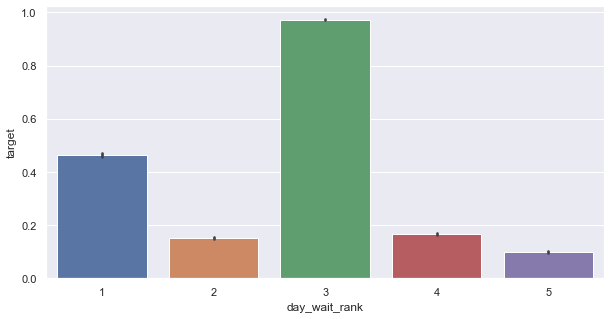

In [436]:
df['day_wait_rank']=pd.qcut(df['days_in_waiting_list'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
a=sns.barplot(x="day_wait_rank",y="target",data=df,estimator=mean)

In [437]:
# Create indicator variable for day_wait_rank
# df['day_wait_ind']=np.where(df['day_wait_rank'].isin(['3']),1,0)
# df.groupby('day_wait_ind')['target'].count()

In [438]:
# Create indicator variable for day_wait_rank
df['day_wait_ind']=np.where(df['day_wait_rank'].isin([3]),1,0)
df.groupby('day_wait_ind')['target'].count()

day_wait_ind
0    95512
1    23878
Name: target, dtype: int64

In [439]:
# Average Daily Rate

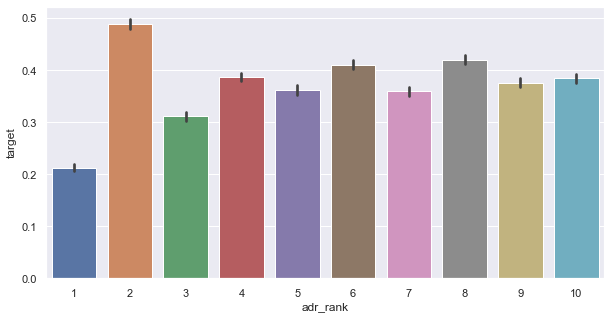

In [440]:
df['adr_rank']=pd.qcut(df['adr'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="adr_rank",y="target",data=df,estimator=mean)

In [441]:
# Previous Cancellation rank

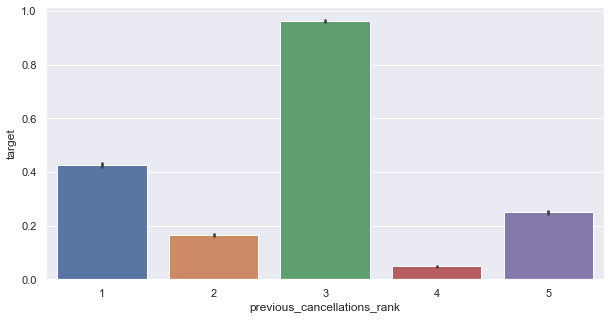

In [442]:
df['previous_cancellations_rank']=pd.qcut(df['previous_cancellations'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="previous_cancellations_rank",y="target",data=df,estimator=mean)

In [443]:
# Lead Time Rank

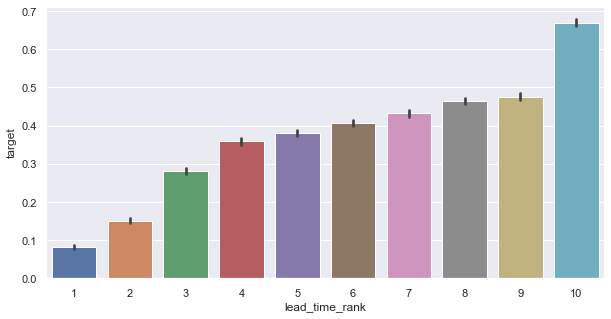

In [444]:
df['lead_time_rank']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="lead_time_rank",y="target",data=df,estimator=mean)

In [445]:
df.groupby('lead_time_rank')['lead_time'].min()

lead_time_rank
1       0
2       3
3      11
4      26
5      45
6      69
7      99
8     138
9     184
10    265
Name: lead_time, dtype: int64

In [446]:
dep=['target']
col_num= ['lead_time','adr']   
         
col_char=['day_wait_ind','total_of_special_requests','customer_type','reserved_room_type',
          'distribution_channel','market_segment',
          'prev_cancel_ind','stay_in_week_night_grp']

In [447]:
X_char_dum = pd.get_dummies(df[col_char], drop_first = True)

In [448]:
X_all=pd.concat([df[col_num],X_char_dum],axis=1, join='inner')

In [449]:
X_var=X_all
Y_var=df['target']

In [450]:
X_all.shape

(119390, 29)

In [451]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

In [452]:
# Logistic regression
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [453]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=100)

In [454]:
# Random Forest
rf_1000 = RandomForestClassifier(n_estimators=1000,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 15)
rf_1000.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000, random_state=2)

In [455]:
# Logistic Regression model Performance Evaluation

In [456]:
y_pred_logreg = logreg.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy: 0.8769857888712064
Precision 0.9560129136400323
Recall 0.7047449055481184
f1_score 0.8113708365442247
Accuracy of Decision Tree classifier on test set: 0.88


In [457]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix)

[[21935   436]
 [ 3970  9476]]


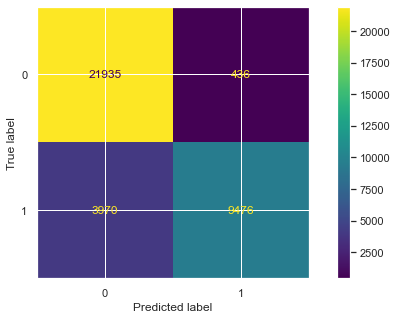

In [458]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [459]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     22371
           1       0.96      0.70      0.81     13446

    accuracy                           0.88     35817
   macro avg       0.90      0.84      0.86     35817
weighted avg       0.89      0.88      0.87     35817



In [460]:
# # Decision Tree  Performance Evaluation

In [461]:
y_pred_tree=dtree.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy: 0.8791076862942179
Precision 0.977877961836863
Recall 0.6936635430611334
f1_score 0.8116080751827358
Accuracy of Decision Tree classifier on test set: 0.88


In [462]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix)

[[22160   211]
 [ 4119  9327]]


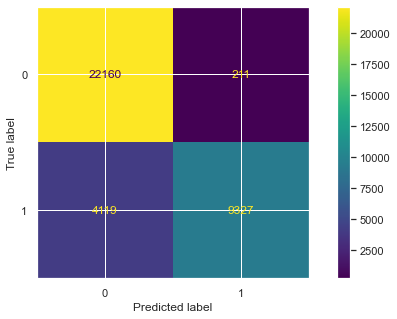

In [463]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [464]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     22371
           1       0.98      0.69      0.81     13446

    accuracy                           0.88     35817
   macro avg       0.91      0.84      0.86     35817
weighted avg       0.89      0.88      0.87     35817



In [465]:
# Random Forest Performance Evaluation

In [466]:
y_pred_rf=rf_1000.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_1000.score(X_test, y_test)))

Accuracy: 0.8942960046905101
Precision 0.9681139755766621
Recall 0.7428975159898855
f1_score 0.8406833866352467
Accuracy of Random Forest classifier on test set: 0.89


In [467]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix)

[[22042   329]
 [ 3457  9989]]


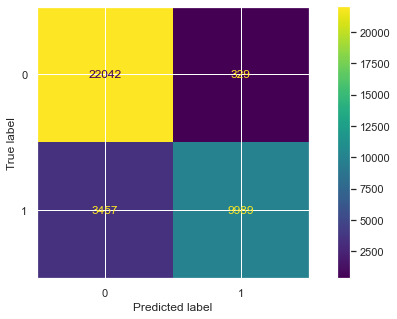

In [468]:
metrics.plot_confusion_matrix(rf_1000,X_test,y_test)

In [469]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     22371
           1       0.97      0.74      0.84     13446

    accuracy                           0.89     35817
   macro avg       0.92      0.86      0.88     35817
weighted avg       0.90      0.89      0.89     35817



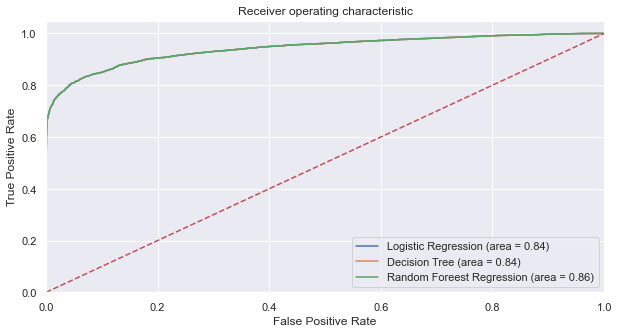

In [470]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rf_1000.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Prediction From The Model

In [471]:
y_pred_prob = logreg.predict_proba(X_var)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank')['y_pred_P'].mean()

P_Rank
1     0.033876
2     0.070614
3     0.098301
4     0.132266
5     0.175711
6     0.224300
7     0.300531
8     0.695466
9     0.972237
10    0.991487
Name: y_pred_P, dtype: float64

In [472]:
y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]
df['y_pred_P_dtree']=pd.DataFrame(y_pred_prob_dtree)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_dtree')['y_pred_P'].mean()

P_Rank_dtree
1     0.106359
2     0.129936
3     0.123430
4     0.135485
5     0.169725
6     0.224869
7     0.213411
8     0.659812
9     0.965741
10    0.966021
Name: y_pred_P, dtype: float64

In [473]:
y_pred_prob_rf = rf_1000.predict_proba(X_var)[:, 1]
df['y_pred_P_rf']=pd.DataFrame(y_pred_prob_rf)
df['P_Rank_rf']=pd.qcut(df['y_pred_P_rf'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_rf')['y_pred_P'].mean()

P_Rank_rf
1     0.105984
2     0.104255
3     0.125097
4     0.142932
5     0.171742
6     0.196198
7     0.259460
8     0.670487
9     0.937345
10    0.981289
Name: y_pred_P, dtype: float64

In [474]:
df.head()
df.to_csv('hotel_demand_prediction_scored_file.csv')